# Titanic - Machine Learning from Disaster
# By Mohamed Eltayeb

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score

# Read the training and testing data


In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
ID = test_df['PassengerId']

# Exploratory data analysis

# Features:

* $Survived$: Survival
* $PassengerId$: Unique Id of a passenger
* $Pclass$: Ticket class
* $Sex$: Sex
* $Age$: Age in years
* $Sibsp$: # of siblings / spouses aboard the Titanic
* $Parch$: # of parents / children aboard the Titanic
* $Ticket$: Ticket number
* $Fare$: Passenger fare
* $Cabin$: Cabin number
* $Embarked$: Port of Embarkation

In [3]:
train_df.shape

(891, 12)

In [4]:
test_df.shape

(418, 11)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


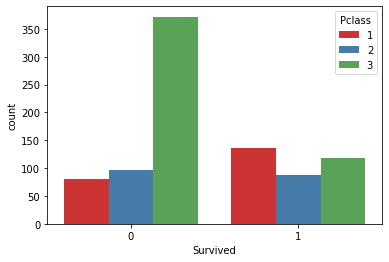

In [10]:
#Pclass
sns.countplot( x='Survived', data=train_df, hue="Pclass", palette="Set1");

It's clear that Pclass 3 has a negative trend with Survival.

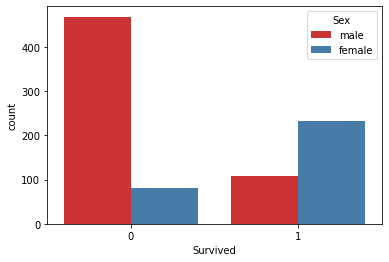

In [11]:
#Sex
sns.countplot( x='Survived', data=train_df, hue="Sex", palette="Set1");

Obviously, women tend to survive much more than men.

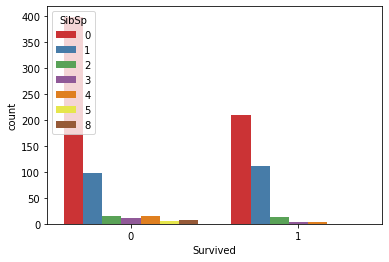

In [12]:
#SibSp
sns.countplot( x='Survived', data=train_df, hue="SibSp", palette="Set1");

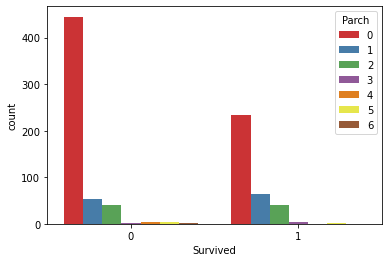

In [13]:
#Parch
sns.countplot( x='Survived', data=train_df, hue="Parch", palette="Set1");

There is a better chance of survival if you have at least one relative.

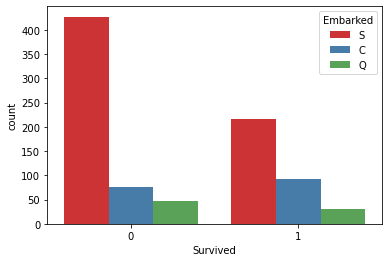

In [14]:
#Embarked
sns.countplot( x='Survived', data=train_df, hue="Embarked", palette="Set1");

Those who embarked from Southampton port have a less chance of survival than others.

[]

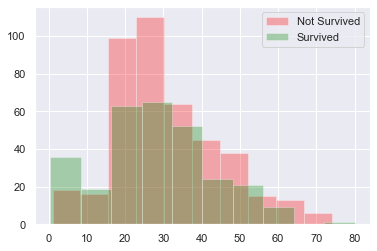

In [15]:
#Age
sns.set()
plt.hist(train_df[train_df['Survived'] == 0].Age, color='red', alpha = 0.3, label = 'Not Survived')
plt.hist(train_df[train_df['Survived'] == 1].Age, color='green', alpha=0.3, label = 'Survived')
plt.legend()
plt.plot()

We can see that those who are aged less than 20 got a better Survival chance

[]

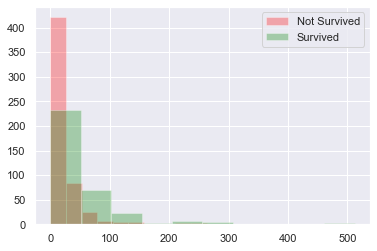

In [16]:
#Fare
sns.set()
plt.hist(train_df[train_df['Survived'] == 0].Fare, color='red', alpha = 0.3, label = 'Not Survived')
plt.hist(train_df[train_df['Survived'] == 1].Fare, color='green', alpha=0.3, label = 'Survived')
plt.legend()
plt.plot()

It looks like that the highest is your Fare, the best Survival chance you get

# Data preprocessing

## Missing Values

In [17]:
#missing data percentage (Training)
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0


In [18]:
#missing data percentage (Testing)
total = test_df.isnull().sum().sort_values(ascending=False)
percent_1 = test_df.isnull().sum()/test_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2
PassengerId,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0


As that 'Cabin' feature has a lot of misssing values, we will drop it. Also, we will drop 'Passengerid' and 'Ticket' as that they have unique values for each sample, so they will be no use.

'Age', 'Fare' and 'Embarked' can be filled with appropriate values.

In [19]:
train_df.drop(['Cabin','PassengerId','Ticket'], axis = 1, inplace = True)
test_df.drop(['Cabin','PassengerId','Ticket'], axis = 1, inplace = True)

In [20]:
#fill missing values of 'Age' with random values within two std of the median
data = [train_df, test_df]

for dataset in data:
    median = train_df["Age"].median()
    std = train_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the median, std with size of is_null
    np.random.seed(42)
    rand_age = np.random.randint(median - 2*std, median + 2*std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = dataset["Age"].astype(int)

In [21]:
#fill missing values of 'Embarked' with the mode
mode = train_df['Embarked'].mode()

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(mode[0]) 

In [22]:
#fill missing values of 'Fare' with the median
median = train_df["Fare"].median()

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(median) 

# Feature Engineering

We can Add 'Parch' and 'SibSp' to give us the number of relatives

In [23]:
for dataset in data:
    dataset['Relatives'] = dataset['Parch'] + dataset['SibSp']

We can add a feature to know if someone is alone

In [24]:
for dataset in data:
    dataset['Alone'] = dataset['Relatives'] == 0

We can add a feature of being less than 20 years old as that it has a different pattern in the histogram

In [25]:
for dataset in data:
    dataset['Young'] = dataset['Age'] <= 20

We can calculate Fare per Person

In [26]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['Relatives']+1) 

We can extract titles from names and build new feature

In [27]:
for dataset in data:
    dataset['Titles'] = dataset.Name.str.extract(' ([A-Za-z]+\.)', expand = False)
    dataset['Titles'] = dataset['Titles'].replace(['Dr.','Rev.','Major.','Col.','Countess.',\
                                                   'Jonkheer.','Sir.','Dona.','Don.','Capt.'],'Rare.')
    dataset['Titles'] = dataset['Titles'].replace(['Ms.','Mlle.','Lady.'],'Miss.')
    dataset['Titles'] = dataset['Titles'].replace(['Mme.'],'Mrs.')
    dataset.drop('Name',axis=1,inplace = True)

We can make the 'Fare' feature more normally distributed

In [28]:
train_df['Fare'] = np.log(train_df['Fare']+0.001)
test_df['Fare'] = np.log(test_df['Fare']+0.001)
#Almost mean == median, so it is more normally distributed
train_df['Fare'].describe()

count    891.000000
mean       2.777626
std        1.571703
min       -6.907755
25%        2.068303
50%        2.671054
75%        3.434019
max        6.238969
Name: Fare, dtype: float64

# Outliers

Get rid of outliers in 'Fare'

In [29]:
z_scores = stats.zscore(train_df['Fare'])
absolute_z_score = np.abs(z_scores)
is_outlier = absolute_z_score >= 2

for x in range(0,train_df['Fare'].size):
    if (is_outlier[x] == True ):
        train_df.drop(axis=1, index=x,inplace=True)

# Scaling Numerical Data

In [30]:
Scaler = StandardScaler()
train_df[['Age','Fare','Fare_Per_Person']] = Scaler.fit_transform(train_df[['Age','Fare','Fare_Per_Person']])
test_df[['Age','Fare','Fare_Per_Person']] = Scaler.transform(test_df[['Age','Fare','Fare_Per_Person']])

# Encoding

In [31]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,Alone,Young,Fare_Per_Person,Titles
0,0,3,male,-0.467325,1,0,-1.036704,S,1,False,False,-0.583263,Mr.
1,1,1,female,0.601196,1,0,1.454785,C,1,False,False,0.642486,Mrs.
2,1,3,female,-0.200195,0,0,-0.939674,S,0,True,False,-0.418638,Miss.
3,1,1,female,0.400848,1,0,1.133769,S,1,False,False,0.294414,Mrs.
4,0,3,male,0.400848,0,0,-0.922616,S,0,True,False,-0.413853,Mr.


## Label Binarizier

In [32]:
lb = LabelBinarizer()
attributes = ['Alone','Young']
for dataset in data:
    dataset[attributes] = lb.fit_transform(dataset[attributes])

## One-hot Encoder

In [33]:
encode_col_list = ['Sex','Embarked','Titles','Pclass']
for i in encode_col_list:
    train_df = pd.concat([train_df,pd.get_dummies(train_df[i], prefix=i)],axis=1)
    train_df.drop(i, axis = 1, inplace=True)
for i in encode_col_list:
    test_df = pd.concat([test_df,pd.get_dummies(test_df[i], prefix=i)],axis=1)
    test_df.drop(i, axis = 1, inplace=True)

#To avoid multicollinearity    
train_df.drop(['Sex_male','Embarked_C','Titles_Rare.','Pclass_2'],axis=1,inplace=True)
test_df.drop(['Sex_male','Embarked_C','Titles_Rare.','Pclass_2'],axis=1,inplace=True)

In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 873 entries, 0 to 890
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Survived         873 non-null    int64  
 1   Age              873 non-null    float64
 2   SibSp            873 non-null    int64  
 3   Parch            873 non-null    int64  
 4   Fare             873 non-null    float64
 5   Relatives        873 non-null    int64  
 6   Alone            873 non-null    int64  
 7   Young            873 non-null    int64  
 8   Fare_Per_Person  873 non-null    float64
 9   Sex_female       873 non-null    uint8  
 10  Embarked_Q       873 non-null    uint8  
 11  Embarked_S       873 non-null    uint8  
 12  Titles_Master.   873 non-null    uint8  
 13  Titles_Miss.     873 non-null    uint8  
 14  Titles_Mr.       873 non-null    uint8  
 15  Titles_Mrs.      873 non-null    uint8  
 16  Pclass_1         873 non-null    uint8  
 17  Pclass_3        

# ML Modeling

## Evaluating on the test set

In [35]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in split.split(train_df, train_df["Titles_Mrs."]):
    strat_train_set = train_df.iloc[train_index]
    strat_test_set = train_df.iloc[test_index]
X_Train = strat_train_set.drop('Survived',axis=1)
y_Train = strat_train_set['Survived']
X_Test = strat_test_set.drop('Survived',axis=1)
y_Test = strat_test_set['Survived']

In [36]:
lr = LogisticRegression(C=0.2)
lr.fit(X_Train,y_Train)
y_pred = lr.predict(X_Test)
accuracy_score(y_pred,y_Test)

0.8053435114503816

In [37]:
X = train_df.drop('Survived',axis=1)
y = train_df['Survived']

In [38]:
lr.fit(X, y)
test_df['Survived'] = lr.predict(test_df)
submission = pd.DataFrame({"PassengerId": ID ,"Survived": test_df.Survived})
submission.to_csv('TitanicSurvivals.csv',index=False)

### Accuracy Score = 0.78468